<a href="https://colab.research.google.com/github/kaojan05/AI/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv

--2024-11-05 20:51:59--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2024-11-05 20:51:59--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.03s   

2024-11-05 20:51:59 (2.33 MB/s) - ‘Google_Stock_Price_Train.csv’ saved [63488/63488]

--

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [7]:
print(X_train.shape)
print(X_train[0])

(1198, 60, 1)
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 65, batch_size = 512)

Epoch 1/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 631ms/step - loss: 0.3388
Epoch 2/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - loss: 0.1426
Epoch 3/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step - loss: 0.0378
Epoch 4/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0265
Epoch 5/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0276
Epoch 6/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 600ms/step - loss: 0.0317
Epoch 7/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 610ms/step - loss: 0.0144
Epoch 8/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 600ms/step - loss: 0.0173
Epoch 9/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0142
Epoch 10/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - loss: 0.0101
Epoch 11/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 613ms/step - loss: 0.0107
Epoch 12/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 605ms/step - loss: 0.0079
Epoch 13/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 879ms/step - loss: 0.0071
Epoch 14/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 636ms/step - loss: 0.0071
Epoch 15/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step - loss: 0.0059
Epoch 16/65
3/3 ━━━━━━━━━━━

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


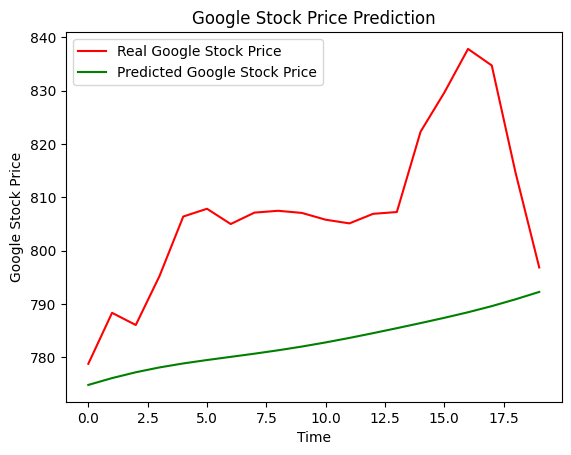

In [23]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()